In [ ]:
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import scipy
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
import pandas_to_pybeh as pb
from cmlreaders import CMLReader, get_data_index
from plotting import *

In [19]:
df = pd.read_csv("RAVLT_w_age.csv")
df['Subject'] = df['Subject Number']
df['Age'] = df['Age at Implant (calculated)']
print(df.columns)
df['RAVLT total recall'] = df['Total Learning Lists 1-5']
df['RAVLT short delay recall'] = df['Immediate Recall']
df['RAVLT long delay recall'] = df['Delayed Recall']
beh = df.drop(['Subject Number', 'Event Name', 'Immediate Recall', 'Total Learning Lists 1-5', 'Delayed Recall', 'Age at Implant (calculated)'], axis = 1)

beh = beh.loc[beh['Subject']!= 578]
rav = beh.dropna(0, 'all')
rav.dropna(subset=['RAVLT total recall'],inplace=True)

mturk = np.load('final_imm_stats.npy') * 75
rav['RAVLT total recall']
zscore = rav.copy()
zscore.set_index('Subject',inplace=True)

# *** VALUES PULLED FROM METANORMS ON PAGE 11 of RAVLT Handbook
# mturk=[53,7.8]
rav['zscore'] = (rav['RAVLT total recall'] - mturk[0])/mturk[1]

# plot_age_zscore(zscore, 'RAVLT Hospital')
rav['RAVLT total recall'], rav['zscore']

zscore_mean = rav['zscore'].mean()
zscore_std = rav.zscore.std()
n = zscore.shape[0]
np.save('ravmturkhospitalzscore', [zscore_mean, zscore_std, n])
print(zscore_mean, zscore_std, n)

Index(['Subject Number', 'Event Name', 'Study site', 'Immediate Recall',
       'Delayed Recall', 'Total Learning Lists 1-5', 'Immediate Recall.1',
       'Delayed Recall.1', 'Total Learning Lists 1-5.1',
       'Age at Implant (calculated)', 'Subject', 'Age'],
      dtype='object')
-0.6195945945945945 0.24864188846167629 111


In [20]:
zscore['RAVLT total recall']=zscore['RAVLT total recall']/75

r(62) = -0.129485127036834, p = 0.30783965811728853


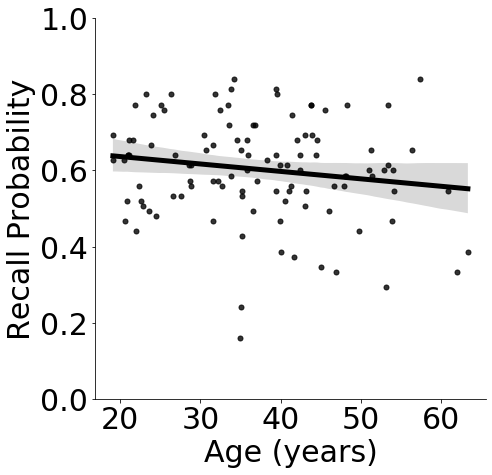

In [21]:
set_axes(fontsize=30, ylim =[0,1])

sns.regplot(data=zscore, x='Age', y = 'RAVLT total recall', color = 'black',scatter_kws=dict(s = 25), line_kws=dict(linewidth=5))

zscore.dropna(inplace=True)
n=zscore.shape[0]
r,p = scipy.stats.pearsonr(zscore['Age'], zscore['RAVLT total recall'])
_=plt.xlabel('Age (years)')
_=plt.ylabel('Recall Probability')
print('r({}) = {}, p = {}'.format(n-2,r,p))
plt.savefig('RAVLT_age.pdf', bbox_inches='tight')

In [22]:
np.save('RAVLTvAge', [r, n])